In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [10]:
SN = 75 * 10**(-4)
L35 = 0.015
l = 0.008
a = 0.002

In [31]:
Is = [0.3 * (i + 1) for i in range(7)]
dI = 0.01
[round(I,1) for I in Is]

[0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1]

In [38]:
Bs = [1.9, 3.7, 5.4, 7.0, 8.2, 8.8, 9.3]
dBS = 0.01 / SN
BS = [B / SN for B in Bs]
[round(B) for B in BS]

[253, 493, 720, 933, 1093, 1173, 1240]

 
558.7 x + 173.3


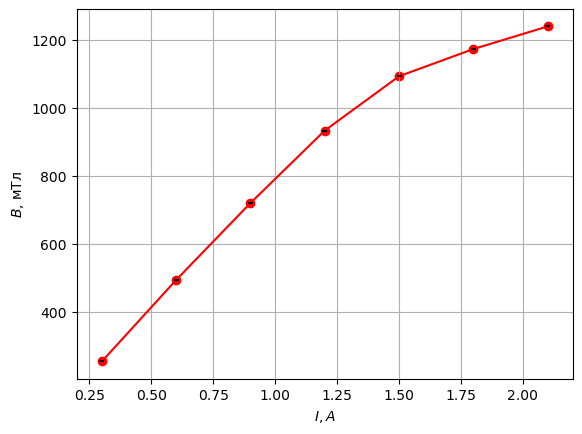

In [30]:
x = Is
y = BS


fig, ax = plt.subplots()

plt.scatter(x, y, marker='o', color='red')

ax.plot(x, y, linestyle='-', color='red')

plt.errorbar(x, y, xerr=[dI for i in range(len(x))], yerr = [dBS for i in range(len(y))], ecolor='k', linestyle='')

model1 = np.poly1d(np.polyfit(x, y, 1))
print(model1)

#polyline = np.linspace(22, 30)
#plt.plot(polyline, model1(polyline), color = 'k')


plt.grid()

plt.xlabel('$I, А$')
plt.ylabel('$B$, мТл')
#plt.show()
plt.savefig('tex/images/plot1.png', bbox_inches='tight')

In [70]:
U0 = [-2.68, -3.63, -4.54, -5.53, -6.33, -7.27]
Us = [
    [-1.24, -0.17, 0.55, 1.22, 1.63, 1.9, 2.1],
    [-1.75, -0.35, 0.63, 1.44, 2.01, 2.4, 2.66],
    [-2.21, -0.41, 0.76, 1.74, 2.46, 2.93, 3.24],
    [-2.76, -1.1, 0.86, 2.04, 2.9, 3.48, 3.83],
    [-3.05, -0.7, 1.00, 2.29, 3.27, 3.92, 4.3],
    [-3.62, -0.93, 1.04, 2.55, 3.68, 4.41, 4.85]
]
dU34 = 0.01

U34 = [[Us[j][i] + U0[j] for i in range(len(Us[0]))]for j in range(len(Us))]
I2 = [(0.3 + 0.1 * i) for i in range(6)]
dI2 = 0.01

In [63]:
Irev = 0.84
U0rev = -8.31
Urev = [-12.39, -15.58, -18.11, -20.22, -21.5, -22.5, -23.04]

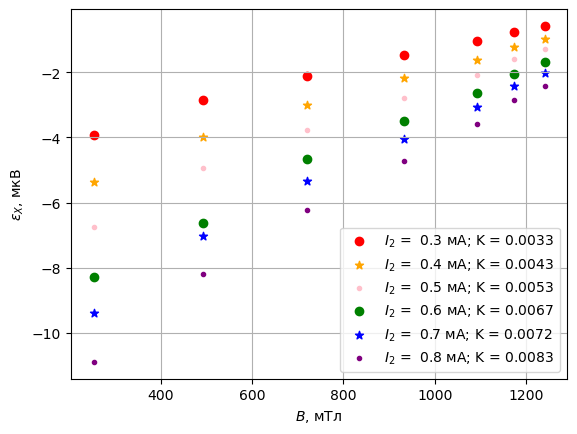

In [121]:
fig, ax = plt.subplots()

plt.scatter(BS, U34[0], marker='o', color='red')
plt.scatter(BS, U34[1], marker='*', color='orange')
plt.scatter(BS, U34[2], marker='.', color='pink')
plt.scatter(BS, U34[3], marker='o', color='green')
plt.scatter(BS, U34[4], marker='*', color='blue')
plt.scatter(BS, U34[5], marker='.', color='purple')


#plt.errorbar(x, y, xerr=[dI for i in range(len(x))], yerr = [dBS for i in range(len(y))], ecolor='k', linestyle='')

model0 = np.poly1d(np.polyfit(BS, U34[0], 1))
model1 = np.poly1d(np.polyfit(BS, U34[1], 1))
model2 = np.poly1d(np.polyfit(BS, U34[2], 1))
model3 = np.poly1d(np.polyfit(BS, U34[3], 1))
model4 = np.poly1d(np.polyfit(BS, U34[4], 1))
model5 = np.poly1d(np.polyfit(BS, U34[5], 1))
k0 = model0.c[0]
k1 = model1.c[0]
k2 = model2.c[0]
k3 = model3.c[0]
k4 = model4.c[0]
k5 = model5.c[0]
Ks = [k0, k1, k2, k3, k4, k5]

legend = ["$I_2$ = {: .1f} мА; K = {:.4f}".format(round(I2[i], 1), round(Ks[i], 4)) for i in range(len(Ks))]
plt.legend(legend)

#polyline = np.linspace(22, 30)
#plt.plot(polyline, model1(polyline), color = 'k')


plt.grid()

plt.ylabel('$\\varepsilon_X$, мкВ')
plt.xlabel('$B$, мТл')
#plt.show()
plt.savefig('tex/images/plot2.png', bbox_inches='tight')

In [87]:
dk = ((dU34/ 0.17)**2 + (dBS / min(BS))**2)**0.5
dKs = [K * dk for K in Ks]
dKs

[0.00019366952747410982,
 0.0002550836757330749,
 0.0003139612358859574,
 0.00039335029015810576,
 0.00042634644703129845,
 0.000492191078020025]

0.684307989639029


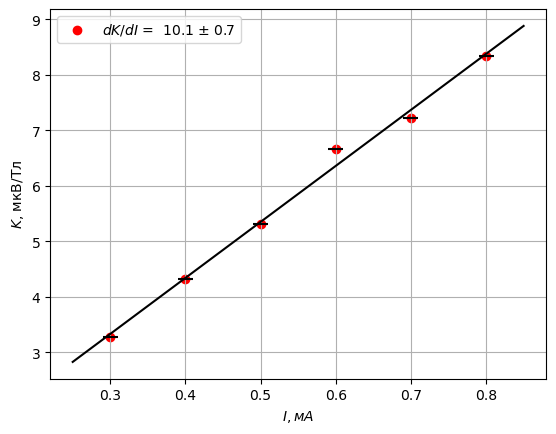

In [120]:
x = I2
y = [K * 1000 for K in Ks]

fig, ax = plt.subplots()

plt.scatter(x, y, marker='o', color='red')

plt.errorbar(x, y, xerr=[dI2 for i in range(len(x))], yerr = dKs, ecolor='k', linestyle='')

model1 = np.poly1d(np.polyfit(x, y, 1))

polyline = np.linspace(0.25, 0.85)
plt.plot(polyline, model1(polyline), color = 'k')

dk2 = ((dk)**2 + (dI2 / min(x))**2)**0.5
dK2 = dk2 * model1.c[0]
print(dK2)

plt.legend(["$dK/dI$ = {: .1f} $\pm$ {:.1f}".format(model1.c[0], dK2)])

plt.grid()

plt.xlabel('$I, мА$')
plt.ylabel('$K$, мкВ/Тл')
#plt.show()
plt.savefig('tex/images/plot3.png', bbox_inches='tight')

In [122]:
Rx = 10.1 * a * 10**(-3)
q = 1.6 * 10**(-19)
n = 1 / (Rx * q)
dn = n * 0.7 / 10.1
print(n, dn)

3.094059405940594e+23 2.1443976080776394e+22


In [116]:
sigma = 0.84 * L35 / (0.13 * a * l)
sigma

6057.692307692306

In [129]:
dsigma = sigma * ((0.005 / 0.84)**2 + (0.005/ 0.13)**2)
dsigma

9.175712416281941

In [125]:
b = sigma / (q * n)
b

0.12236538461538457

In [135]:
((dsigma / sigma)**2 + (dn / n)**2)**0.5 * b

0.008482794418246578

In [133]:
(7**2 + 0.1**2)**0.5

7.000714249274855

In [131]:
dsigma / sigma

0.00151472077983067

In [132]:
dn / n

0.06930693069306931